In [121]:
import os
from segmenters.structure import StructuredCorpus
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn import svm
from sklearn import tree
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

dirs = [
    'swda_mfs_20w',
    #'swda_mfs_100w',
]

In [7]:
dirname = dirs[0]
print(dirname)

swda_mfs_20w


# Correlation matrix

In [100]:
dim=6
names_iso = ['AE', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_iso = [name+'_dim='+str(dim) for name in names_iso]
names_con1 = ['SG', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_con1 = [name+'_dim='+str(dim)+'_context=1' for name in names_con1]
names_con2 = ['SG', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_con2 = [name+'_dim='+str(dim)+'_context=2' for name in names_con2]

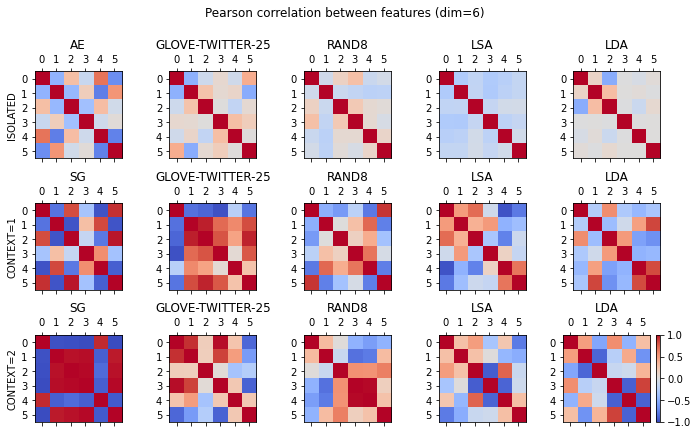

In [106]:
fig, ax = plt.subplots(3,max(len(names_iso), len(names_iso)), figsize=(10, 6))
for i, names in enumerate([names_iso, names_con1, names_con2]):
    rep_type = 'iso' if i == 0 else 'con'
    for j, name in enumerate(names): 
        try: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/train.npy')
        except FileNotFoundError: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/dev.npy')
        #X_test = np.load(f'{dirname}/sents_{rep_type}/{name}_dim={dim}/test.npy')
        corr = np.corrcoef(X_train.T)
        im = ax[i, j].matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
        title = name.split('_')[0]
        #ax[i, j].set_title(f'{title} ({rep_type})')
        if i == 0 and j == 0: 
            ax[i, j].set_ylabel('ISOLATED')
        if i == 1 and j == 0: 
            ax[i, j].set_ylabel('CONTEXT=1')
        if i == 2 and j == 0: 
            ax[i, j].set_ylabel('CONTEXT=2')
        #if i == 0: 
        ax[i, j].set_title(f'{title}')
fig.colorbar(im)
fig.tight_layout()
st = fig.suptitle(f'Pearson correlation between features (dim={dim})')
st.set_y(1.0)
fig.subplots_adjust(top=0.85)


In [107]:
dim=12
names_iso = ['AE', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_iso = [name+'_dim='+str(dim) for name in names_iso]
names_con1 = ['SG', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_con1 = [name+'_dim='+str(dim)+'_context=1' for name in names_con1]
names_con2 = ['SG', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_con2 = [name+'_dim='+str(dim)+'_context=2' for name in names_con2]

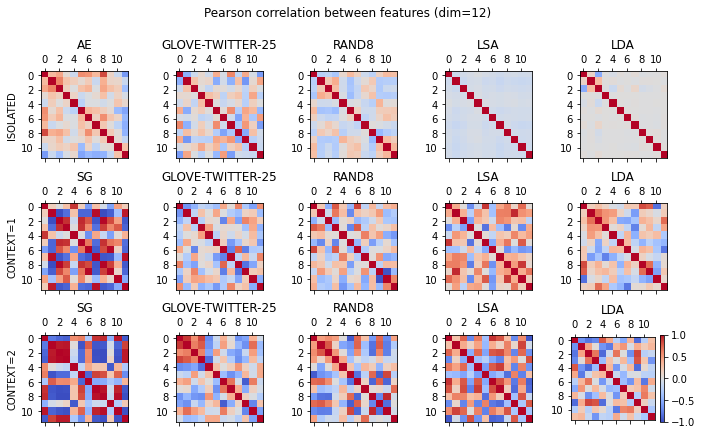

In [108]:
fig, ax = plt.subplots(3,max(len(names_iso), len(names_iso)), figsize=(10, 6))
for i, names in enumerate([names_iso, names_con1, names_con2]):
    rep_type = 'iso' if i == 0 else 'con'
    for j, name in enumerate(names): 
        try: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/train.npy')
        except FileNotFoundError: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/dev.npy')
        #X_test = np.load(f'{dirname}/sents_{rep_type}/{name}_dim={dim}/test.npy')
        corr = np.corrcoef(X_train.T)
        im = ax[i, j].matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
        title = name.split('_')[0]
        #ax[i, j].set_title(f'{title} ({rep_type})')
        if i == 0 and j == 0: 
            ax[i, j].set_ylabel('ISOLATED')
        if i == 1 and j == 0: 
            ax[i, j].set_ylabel('CONTEXT=1')
        if i == 2 and j == 0: 
            ax[i, j].set_ylabel('CONTEXT=2')
        #if i == 0: 
        ax[i, j].set_title(f'{title}')
fig.colorbar(im)
fig.tight_layout()
st = fig.suptitle(f'Pearson correlation between features (dim={dim})')
st.set_y(1.0)
fig.subplots_adjust(top=0.85)


In [109]:
dim=25
names_iso = ['AE', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_iso = [name+'_dim='+str(dim) for name in names_iso]
names_con1 = ['SG', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_con1 = [name+'_dim='+str(dim)+'_context=1' for name in names_con1]
names_con2 = ['SG', 'GLOVE-TWITTER-25', 'RAND8', 'LSA', 'LDA']
names_con2 = [name+'_dim='+str(dim)+'_context=2' for name in names_con2]

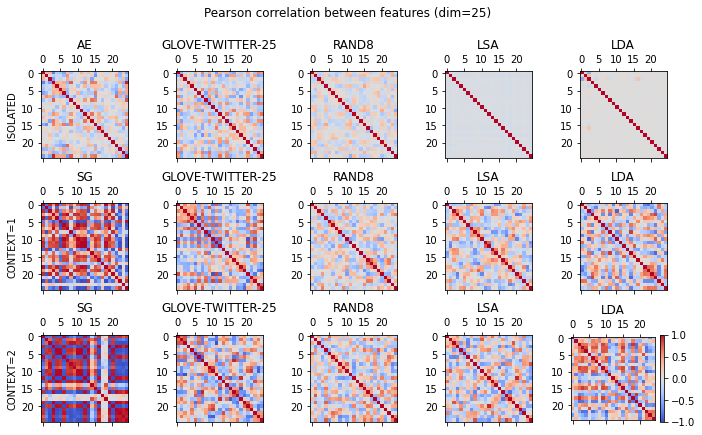

In [110]:
fig, ax = plt.subplots(3,max(len(names_iso), len(names_iso)), figsize=(10, 6))
for i, names in enumerate([names_iso, names_con1, names_con2]):
    rep_type = 'iso' if i == 0 else 'con'
    for j, name in enumerate(names): 
        try: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/train.npy')
        except FileNotFoundError: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/dev.npy')
        #X_test = np.load(f'{dirname}/sents_{rep_type}/{name}_dim={dim}/test.npy')
        corr = np.corrcoef(X_train.T)
        im = ax[i, j].matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
        title = name.split('_')[0]
        #ax[i, j].set_title(f'{title} ({rep_type})')
        if i == 0 and j == 0: 
            ax[i, j].set_ylabel('ISOLATED')
        if i == 1 and j == 0: 
            ax[i, j].set_ylabel('CONTEXT=1')
        if i == 2 and j == 0: 
            ax[i, j].set_ylabel('CONTEXT=2')
        #if i == 0: 
        ax[i, j].set_title(f'{title}')
fig.colorbar(im)
fig.tight_layout()
st = fig.suptitle(f'Pearson correlation between features (dim={dim})')
st.set_y(1.0)
fig.subplots_adjust(top=0.85)


# Corpus statistics

In [149]:
n_labels=10
n_samples=10000
cv=10
classifiers = {
    #f'lrcv{cv}': lambda: LogisticRegressionCV(random_state=1, max_iter=10000, cv=cv),
    f'ridge_cv{cv}': lambda: RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), cv=cv),
}

def load_corpora_and_targets(dirname):
    ctrain = StructuredCorpus.load(f'{dirname}/corpus/train')
    ctest = StructuredCorpus.load(f'{dirname}/corpus/test')
    cdev = StructuredCorpus.load(f'{dirname}/corpus/dev')

    targets_train = [da[1] for _, da in ctrain[['default', 'act_tag']]]
    targets_dev = [da[1] for _, da in cdev[['default', 'act_tag']]]
    targets_test = [da[1] for _, da in ctest[['default', 'act_tag']]]
    for i in range(len(targets_train)):
        if targets_train[i] == '+':
            targets_train[i] = targets_train[i-1]
    for i in range(len(targets_dev)):
        if targets_dev[i] == '+':
            targets_dev[i] = targets_dev[i-1]
    for i in range(len(targets_test)):
        if targets_test[i] == '+':
            targets_test[i] = targets_test[i-1]
    return (ctrain, cdev, ctest), (targets_train, targets_dev, targets_test)



In [150]:
(ctrain, cdev, ctest), (targets_train, targets_dev, targets_test) = load_corpora_and_targets(dirname)

In [153]:
n_labels=5
targets_counts = dict(zip(*np.unique(targets_test, return_counts=True)))    
targets_counts = sorted(targets_counts.items(), key=lambda x: x[1], reverse=True)
def simplify_target(tg, most_common=n_labels, unk_label='%'):
    labels = [lab for lab, count in targets_counts[:most_common]]
    return tg if tg in labels else unk_label

simple_targets_train = [simplify_target(t) for t in targets_train]
simple_targets_dev = [simplify_target(t) for t in targets_dev]
simple_targets_test = [simplify_target(t) for t in targets_test]

simple_counts_train = list(zip(*np.unique(simple_targets_train, return_counts=True)))
simple_counts_train = sorted(simple_counts_train, key=lambda x: x[1], reverse=True)
simple_counts_dev = dict(zip(*np.unique(simple_targets_dev, return_counts=True)))
simple_counts_test = dict(zip(*np.unique(simple_targets_test, return_counts=True)))
freq_table = []
for label, count in simple_counts_train: 
    freq_table.append({'label': label, 'train': count, 'dev': simple_counts_dev[label], 'test': simple_counts_test[label]})
freq_table = pd.DataFrame(freq_table)
freq_table['train%'] = (freq_table['train'] / freq_table['train'].sum())*100
freq_table['dev%'] = (freq_table['dev'] / freq_table['dev'].sum())*100
freq_table['test%'] = (freq_table['test'] / freq_table['test'].sum())*100
freq_table = freq_table.round(2)
print(freq_table)
#freq_table.to_csv(f'{dirname}/label_freq.csv', sep='\t')

  label  train   dev  test  train%   dev%  test%
0    sd  75245  8889  9281   35.47  33.52  35.00
1     %  58227  6833  6789   27.45  25.77  25.60
2     b  39280  5712  6105   18.52  21.54  23.02
3    sv  29196  3872  3641   13.76  14.60  13.73
4    aa  10197  1212   703    4.81   4.57   2.65


In [124]:
len(ctrain.sequences), len(cdev.sequences), len(ctest.sequences)

(212145, 26518, 26519)

In [ ]:
for corp in [ctrain, cdev, ctest]:
    token_counts = list(map(len, corp.sequences))
    #plt.hist(token_counts)
    num_tokens = sum(token_counts)
    mean_sent_len = num_tokens / len(token_counts)
    print(num_tokens, mean_sent_len)

1832778 8.639270310400905
227134 8.565276416019307
222739 8.399223198461481


In [ ]:
print(len(ctrain)-3) #exclude the special tokens

13451


# Corpus examples

In [160]:
for seq, (l1, l2) in itertools.islice(ctrain[['act_tag', 'default']], 15):
    print(ctrain.decode_sent(seq, stringify=True))
    print(l1)
    print()

do you know anyone that , uh , is , is in a nursing home or has ever been in
qr

been in one ?
qr

no .
nn

but i , my grandparent s were looking into it before
sd^e

so i know what they 've said .
sd

uhhuh .
b

uhhuh .
b^m

well , i ' m try ing to think .
^h

my , uh , uh , wife 's grandmother had alz heimer 's
sd

and they were going to put her into a , a nursing home
sd

and , uh , they , when they put her in , she had all kind s of trouble
sd

and the nursing home made them come and take her back be cause she was be ing a , a
sd

, a , you know , a , a nuisance . or worse than a nuisance ,
sd

i mean  
sd

oh they thought it was too much of a bother .
bf



# Evaluation

In [164]:

n_samples=100000
cv=10
n_labels=10
classifiers = {
    #f'logreg_cv{cv}': lambda: LogisticRegressionCV(random_state=1, max_iter=10000, cv=cv),
    #f'logreg_cv{cv}': lambda: LogisticRegressionCV(random_state=1, max_iter=10000, cv=cv, solver='saga'),
    f'ridge_cv{cv}': lambda: RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), cv=cv),
}

In [217]:
(ctrain, cdev, ctest), (targets_train, targets_dev, targets_test) = load_corpora_and_targets(dirname)

targets_counts = dict(zip(*np.unique(targets_test, return_counts=True)))    
targets_counts = sorted(targets_counts.items(), key=lambda x: x[1], reverse=True)
def simplify_target(tg, most_common=n_labels-1, unk_label='%'):
    labels = [lab for lab, count in targets_counts[:most_common]]
    return tg if tg in labels else unk_label

simple_targets_train = [simplify_target(t) for t in targets_train]
simple_targets_dev = [simplify_target(t) for t in targets_dev]
simple_targets_test = [simplify_target(t) for t in targets_test]

simple_counts_train = list(zip(*np.unique(simple_targets_train, return_counts=True)))
simple_counts_train = sorted(simple_counts_train, key=lambda x: x[1], reverse=True)
simple_counts_dev = dict(zip(*np.unique(simple_targets_dev, return_counts=True)))
simple_counts_test = dict(zip(*np.unique(simple_targets_test, return_counts=True)))
freq_table = []
for label, count in simple_counts_train: 
    freq_table.append({'label': label, 'train': count, 'dev': simple_counts_dev[label], 'test': simple_counts_test[label]})
freq_table = pd.DataFrame(freq_table)
freq_table['train%'] = (freq_table['train'] / freq_table['train'].sum())*100
freq_table['dev%'] = (freq_table['dev'] / freq_table['dev'].sum())*100
freq_table['test%'] = (freq_table['test'] / freq_table['test'].sum())*100
freq_table = freq_table.round(2)
print(freq_table)
freq_table.to_csv(f'{dirname}/label_freq.csv', sep='\t')

  label  train   dev  test  train%   dev%  test%
0    sd  75245  8889  9281   35.47  33.52  35.00
1     %  45448  5247  4909   21.42  19.79  18.51
2     b  39280  5712  6105   18.52  21.54  23.02
3    sv  29196  3872  3641   13.76  14.60  13.73
4    aa  10197  1212   703    4.81   4.57   2.65
5    ba   4591   564   690    2.16   2.13   2.60
6    qy   3660   458   441    1.73   1.73   1.66
7    ny   2473   352   313    1.17   1.33   1.18
8   b^r   2055   212   436    0.97   0.80   1.64


In [218]:
result_table = []
sent_dirs = [name for name in os.listdir(f'{dirname}') if 'sents' in name]
for rep_type in ['iso', 'con']: 
    if not os.path.isdir(f'{dirname}/sents_{rep_type}'): continue
    for name in os.listdir(f'{dirname}/sents_{rep_type}'): 
        #if name[0] == '.' or name[:2] in ['AE', 'SG']:
        if name[0] == '.':
            continue
        print(dirname, rep_type, name)
        try: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/train.npy')
            Y_train = simple_targets_train
        except FileNotFoundError: 
            X_train = np.load(f'{dirname}/sents_{rep_type}/{name}/dev.npy')
            Y_train = simple_targets_dev

        X_test = np.load(f'{dirname}/sents_{rep_type}/{name}/test.npy')
        Y_test = simple_targets_test

        result = {
            'dataset': dirname, 
            'type': rep_type, 
            'representation': name, 
        }
        for clf_name, clf_init in classifiers.items():
            clf = clf_init()
            clf.fit(X_train[:n_samples], Y_train[:n_samples])
            Y_hat = clf.predict(X_test)
            acc = accuracy_score(Y_test, Y_hat)
            f1_micro = f1_score(Y_test, Y_hat, average='micro')
            f1_macro = f1_score(Y_test, Y_hat, average='macro')
            print(f'{clf_name}\tacc={acc}\tf1_micro={f1_micro}\tf1_macro={f1_macro}')
            result[f'{clf_name}_acc'] = acc
            result[f'{clf_name}_f1ma'] = f1_macro
            result[f'{clf_name}_f1mi'] = f1_micro
        result_table.append(result)
        result_table_df = pd.DataFrame(result_table)
        result_table_df = result_table_df.round(4)
        result_table_df.to_csv(f'{dirname}/results.csv', sep='\t')

swda_mfs_20w iso LDA_dim=12
ridge_cv10	acc=0.533164900637279	f1_micro=0.533164900637279	f1_macro=0.18343166724192114
swda_mfs_20w iso LSA_dim=6
ridge_cv10	acc=0.5107281571703307	f1_micro=0.5107281571703307	f1_macro=0.14551318389981904
swda_mfs_20w iso GLOVE-TWITTER-25_dim=6
ridge_cv10	acc=0.5161959349900072	f1_micro=0.5161959349900072	f1_macro=0.18285825631518066
swda_mfs_20w iso LDA_dim=25
ridge_cv10	acc=0.5682340963083072	f1_micro=0.5682340963083072	f1_macro=0.24309974015825725
swda_mfs_20w iso AE_dim=12
ridge_cv10	acc=0.5446283796523248	f1_micro=0.5446283796523248	f1_macro=0.19332040540163767
swda_mfs_20w iso LSA_dim=12
ridge_cv10	acc=0.5194011840567141	f1_micro=0.5194011840567141	f1_macro=0.18049087223587992
swda_mfs_20w iso AE_dim=25
ridge_cv10	acc=0.5242656208755986	f1_micro=0.5242656208755986	f1_macro=0.18830022356134207
swda_mfs_20w iso LSA_dim=25
ridge_cv10	acc=0.5201553603077039	f1_micro=0.5201553603077039	f1_macro=0.17910262921757594
swda_mfs_20w iso AE_dim=6
ridge_cv10	acc=

In [219]:
result_table_df = pd.DataFrame(result_table)
result_table_df = result_table_df.round(4)
subset=result_table_df['type']=='iso'
result_table_df.loc[subset, 'representation'] = result_table_df[subset]['representation']+'_'
result_table_df

,dataset,type,representation,ridge_cv10_acc,ridge_cv10_f1ma,ridge_cv10_f1mi
0,swda_mfs_20w,iso,LDA_dim=12_,0.5332,0.1834,0.5332
1,swda_mfs_20w,iso,LSA_dim=6_,0.5107,0.1455,0.5107
2,swda_mfs_20w,iso,GLOVE-TWITTER-25_dim=6_,0.5162,0.1829,0.5162
3,swda_mfs_20w,iso,LDA_dim=25_,0.5682,0.2431,0.5682
4,swda_mfs_20w,iso,AE_dim=12_,0.5446,0.1933,0.5446
5,swda_mfs_20w,iso,LSA_dim=12_,0.5194,0.1805,0.5194
6,swda_mfs_20w,iso,AE_dim=25_,0.5243,0.1883,0.5243
7,swda_mfs_20w,iso,LSA_dim=25_,0.5202,0.1791,0.5202
8,swda_mfs_20w,iso,AE_dim=6_,0.5388,0.1844,0.5388
9,swda_mfs_20w,iso,GLOVE-TWITTER-25_dim=12_,0.5282,0.1959,0.5282


In [221]:
attribs = result_table_df['representation'].str.split('_')
result_table_df[['algo','dim','context']] = pd.DataFrame(attribs.tolist(), index= result_table_df.index)
result_table_df['dim'] = result_table_df['dim'].map(lambda x: x.split('=')[1]).astype(int)
result_table_df['context'] = result_table_df['context'].map(lambda x: -1 if x == '' else x.split('=')[1])
result_table_df

,dataset,type,representation,ridge_cv10_acc,ridge_cv10_f1ma,ridge_cv10_f1mi,algo,dim,context
0,swda_mfs_20w,iso,LDA_dim=12_,0.5332,0.1834,0.5332,LDA,12,-1
1,swda_mfs_20w,iso,LSA_dim=6_,0.5107,0.1455,0.5107,LSA,6,-1
2,swda_mfs_20w,iso,GLOVE-TWITTER-25_dim=6_,0.5162,0.1829,0.5162,GLOVE-TWITTER-25,6,-1
3,swda_mfs_20w,iso,LDA_dim=25_,0.5682,0.2431,0.5682,LDA,25,-1
4,swda_mfs_20w,iso,AE_dim=12_,0.5446,0.1933,0.5446,AE,12,-1
5,swda_mfs_20w,iso,LSA_dim=12_,0.5194,0.1805,0.5194,LSA,12,-1
6,swda_mfs_20w,iso,AE_dim=25_,0.5243,0.1883,0.5243,AE,25,-1
7,swda_mfs_20w,iso,LSA_dim=25_,0.5202,0.1791,0.5202,LSA,25,-1
8,swda_mfs_20w,iso,AE_dim=6_,0.5388,0.1844,0.5388,AE,6,-1
9,swda_mfs_20w,iso,GLOVE-TWITTER-25_dim=12_,0.5282,0.1959,0.5282,GLOVE-TWITTER-25,12,-1


In [222]:
final = result_table_df[['algo', 'dim', 'context', 'ridge_cv10_acc']]
final['algo'] = final['algo'].str.slice(0,5)
final = final.pivot(index=['algo', 'dim'], columns=['context'], values=['ridge_cv10_acc']).sort_values(['algo', 'dim'])
final = final * 100
final = final['ridge_cv10_acc']
final


/var/folders/n_/nb0nr2sd6_925f9251v_rm_w0000gn/T/ipykernel_32003/2047893900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['algo'] = final['algo'].str.slice(0,5)


context       -1      1      2
algo  dim                     
AE    6    53.88  52.27  51.63
      12   54.46  53.89  52.34
      25   52.43  53.18  52.57
GLOVE 6    51.62  50.37  50.14
      12   52.82  52.60  52.55
      25   57.29  57.24  56.52
LDA   6    51.10  51.16  51.05
      12   53.32  52.99  52.73
      25   56.82  56.36  56.13
LSA   6    51.07  50.62  50.58
      12   51.94  51.44  51.04
      25   52.02  52.11  52.12
RAND8 6    36.52  41.55  41.83
      12   46.99  47.17  46.47
      25   48.46  47.69  47.59
SG    6      NaN  51.13  39.66
      12     NaN  53.33  52.38
      25     NaN  55.21  57.54

In [223]:
print(final.to_latex())

\begin{tabular}{llrrr}
\toprule
   & context &     -1 &      1 &      2 \\
algo & dim &        &        &        \\
\midrule
AE & 6  &  53.88 &  52.27 &  51.63 \\
   & 12 &  54.46 &  53.89 &  52.34 \\
   & 25 &  52.43 &  53.18 &  52.57 \\
GLOVE & 6  &  51.62 &  50.37 &  50.14 \\
   & 12 &  52.82 &  52.60 &  52.55 \\
   & 25 &  57.29 &  57.24 &  56.52 \\
LDA & 6  &  51.10 &  51.16 &  51.05 \\
   & 12 &  53.32 &  52.99 &  52.73 \\
   & 25 &  56.82 &  56.36 &  56.13 \\
LSA & 6  &  51.07 &  50.62 &  50.58 \\
   & 12 &  51.94 &  51.44 &  51.04 \\
   & 25 &  52.02 &  52.11 &  52.12 \\
RAND8 & 6  &  36.52 &  41.55 &  41.83 \\
   & 12 &  46.99 &  47.17 &  46.47 \\
   & 25 &  48.46 &  47.69 &  47.59 \\
SG & 6  &    NaN &  51.13 &  39.66 \\
   & 12 &    NaN &  53.33 &  52.38 \\
   & 25 &    NaN &  55.21 &  57.54 \\
\bottomrule
\end{tabular}

